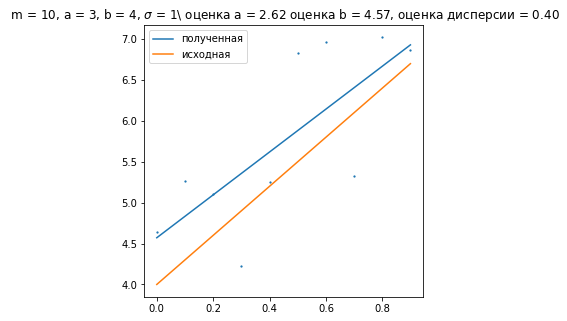

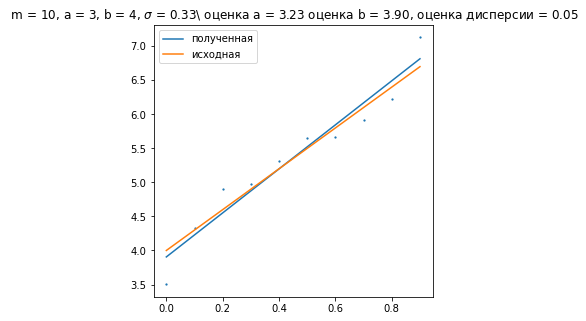

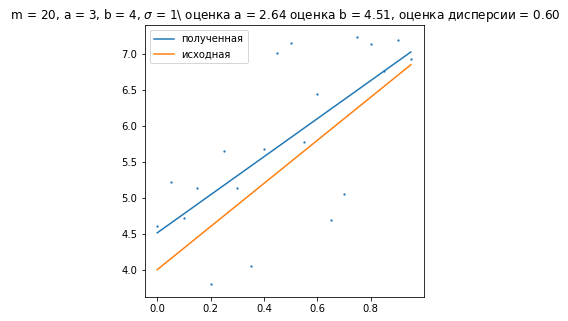

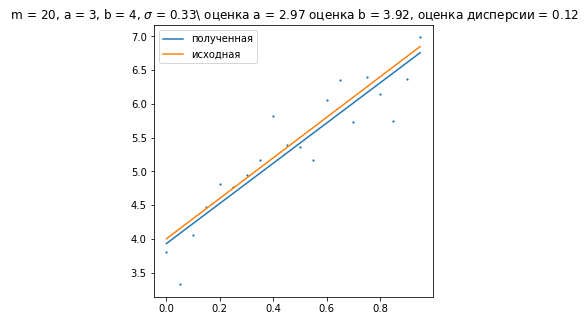

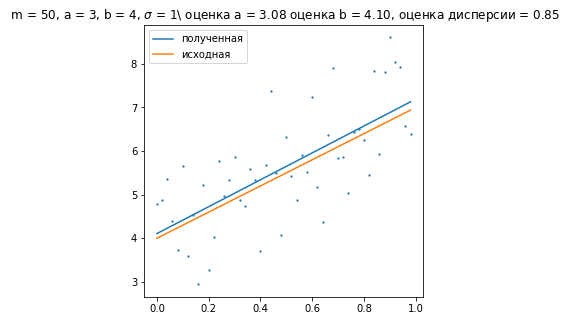

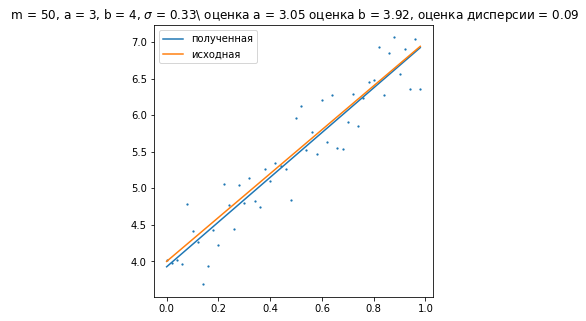

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats as sc
from sklearn.linear_model import LinearRegression

def sigma_est(x, y, a, b):
    res = 0
    for i in range(len(x)):
        res += (y[i][0] - a*x[i][0] - b)**2
    return res/(len(x) + 1)

m = [10, 20, 50]
a = 3
b = 4
sigma = [1, 1/3] 
for i in range(len(m)):
    for j in range(len(sigma)):
        x = np.arange(0, 1, 1/m[i]).reshape(-1, 1)
        eps = sc.norm.rvs(scale = sigma[j], size = m[i])
        y = a*x+b + eps.reshape(-1, 1)
        y0 = a*x+b
        model = LinearRegression()
        model.fit(x, y)
        a1 = model.coef_[0][0]
        b1 = model.intercept_[0]
        y1 = a1*x+b1
        plt.figure(figsize = (5,5))
        plt.scatter(x, y, s = 1.5)
        plt.plot(x, y1, x, y0)
        plt.legend(["полученная", "исходная"])
        plt.title(" m = " + str(m[i]) + ", a = " + str(a) + ", b = " + str(b) + ", $\sigma$ = " + str(sigma[j])[:4] + "\\ оценка a = " + str(a1)[:4] + " оценка b = " + str(b1)[:4] + ", оценка дисперсии = " + str(sigma_est(x, y, a1, b1))[:4])
plt.show()